<a href="https://colab.research.google.com/github/sskamalapurkar/EDA_Hotel_Booking_Analysis/blob/main/EDA_Hotel_Booking_Analysis_Sayali_Kamalapurkar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

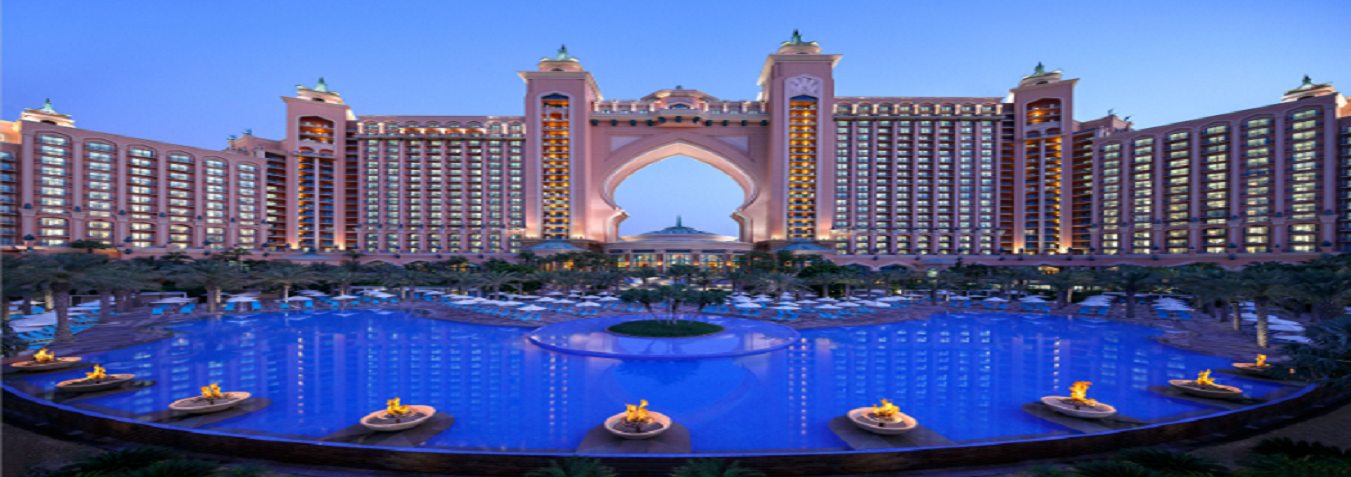

# **Introduction**

---





In today’s highly competitive online travel marketplace, it is vital that hotels understand who their consumers are and what their decision-making process entails when making hotel bookings.


However, the science behind the decision-making process involved in booking a hotel is by no means a straightforward matter. It’s driven by a range of important factors, including the customer profile, their personal preferences, and whether hotels meet these criteria. Navigating through these factors to increase direct sales can be a tough nut to crack for many hotels competing online.

We are given a hotel booking dataset, which is in a tabular form containing information such as arrival date, hotel type, length of stay, number of guests, meal plan, deposit type etc. and so on.

While making a hotel booking, everyone of us is interested to get the best rate possible with maximizing our requirements like child-friendly, pet-friendly, breakfast included, no prepayment or pay at the property, etc.

So, here we are to analyze the hotel booking dataset which helps customers to decide on their booking with optimal length of stay with best daily rate, etc. Also, on the other hand, for Hotel management, we are going to explore the factors which are highly correlated with booking cancelations from customers and to predict how likely a hotel can receive disproportionately high number of special requests and so on.

LET US START EXPLORING!






# Importing python libraries for data manipulation and visualization

---



In [ ]:
#Importing Required Libraries
import numpy as np                          #Data Manipulation library
import pandas as pd                         #Data Manipulation library
import matplotlib.pyplot as plt             #Visualization library
import seaborn as sns                       #Visualization library

pd.set_option('float_format', '{:,.2f}'.format)

# Building a connection between drive and colab 

---



In [ ]:
#Mounting the drive in Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Hotel Bookings dataset

---



In [ ]:
#Importing dataset from source location
file_path = '/content/drive/MyDrive/Hotel Booking Analysis-EDA/Hotel Bookings.csv'
DataFrame = pd.read_csv(file_path)
df = DataFrame.copy()

# Some glimpses of the dataset we have!

---



In [ ]:
#Getting the shape of the dataset:    Number of rows = 119390   |   Number of columns = 32
df.shape

(119390, 32)

In [ ]:
#Lets have a look at the first 5 rows of the dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.00,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.00,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03


In [ ]:
#Getting information about each column of the dataframe such as Name, non-null count and data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
#Listing all categorical columns
cat_cols = list(df.select_dtypes(include = 'object').columns)
print(f'Number of Categorical Columns: {len(cat_cols)}')
print(f'Categorical Columns: {cat_cols}')

Number of Categorical Columns: 12
Categorical Columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']


In [ ]:
#Listing all numerical columns
num_cols = list(df.select_dtypes(exclude = 'object').columns)
print(f'Number of Continuous Columns: {len(num_cols)}')
print(f'Continuous Columns: {num_cols}')

Number of Continuous Columns: 20
Continuous Columns: ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']


In [ ]:
#Statistics for Numerical columns 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,"119,390.00",0.37,0.48,0.00,0.00,0.00,1.00,1.00
lead_time,"119,390.00",104.01,106.86,0.00,18.00,69.00,160.00,737.00
arrival_date_year,"119,390.00","2,016.16",0.71,"2,015.00","2,016.00","2,016.00","2,017.00","2,017.00"
arrival_date_week_number,"119,390.00",27.17,13.61,1.00,16.00,28.00,38.00,53.00
arrival_date_day_of_month,"119,390.00",15.80,8.78,1.00,8.00,16.00,23.00,31.00
stays_in_weekend_nights,"119,390.00",0.93,1.00,0.00,0.00,1.00,2.00,19.00
stays_in_week_nights,"119,390.00",2.50,1.91,0.00,1.00,2.00,3.00,50.00
adults,"119,390.00",1.86,0.58,0.00,2.00,2.00,2.00,55.00
children,"119,386.00",0.10,0.40,0.00,0.00,0.00,0.00,10.00
babies,"119,390.00",0.01,0.10,0.00,0.00,0.00,0.00,10.00


In [ ]:
#Statistics for Categorical columns
df.describe(include = 'object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


# Dealing with null values

---



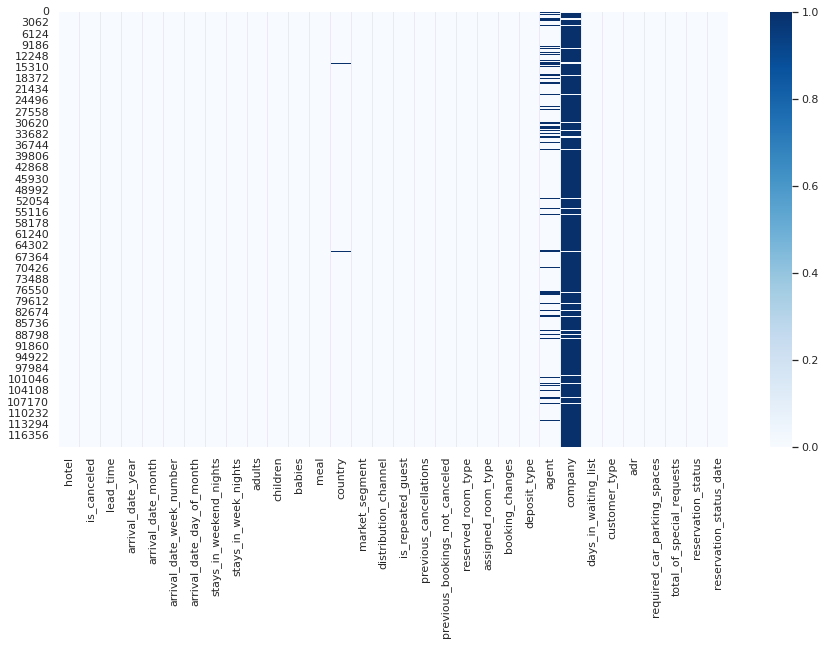

In [ ]:
#Plotting Heatmap to see columns having null values
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isna(),cmap='Blues')

In [ ]:
#Checking for number of null values in each column
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
#Dropping the columns : Company and Agent (with high null values and least significance)
df.drop('company', axis=1, inplace=True)
df.drop('agent', axis=1, inplace=True)

In [ ]:
#Imputing Null values with appropriate measures
df['country'].fillna(df['country'].mode().to_string(), inplace=True)    #Country with highest frequency (mode)
df['children'].fillna(round(df['children'].mean()), inplace=True)       #Children with average number of children (mean)

In [ ]:
#Checking again for null values after imputations 
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

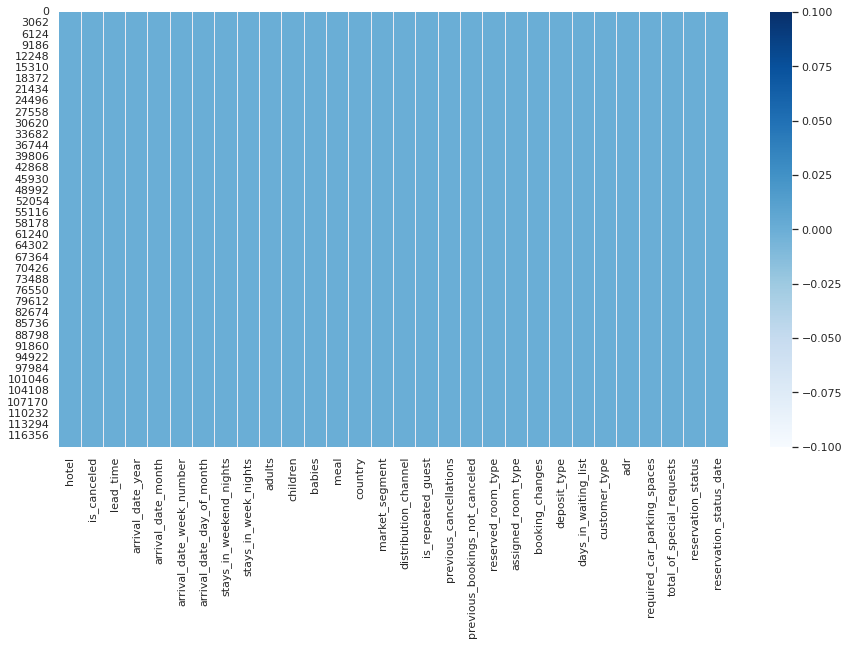

In [ ]:
#plotting heatmap of the revised dataframe (after dealt with null values)
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isna(),cmap='Blues')

In [ ]:
#Revised Dataframe
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03


# Data Cleaning

As we can see there are three columns for guests - Adults, Children and Babies. First we will check for the unique values these columns have.

In [ ]:
sorted(list(df['adults'].unique()))   #for adults column

[0, 1, 2, 3, 4, 5, 6, 10, 20, 26, 27, 40, 50, 55]

In [ ]:
sorted(list(df['children'].unique()))   #for children column

[0.0, 1.0, 2.0, 3.0, 10.0]

In [ ]:
sorted(list(df['babies'].unique()))   #for babies column

[0, 1, 2, 9, 10]

Here, all the three columns have 0 as one of the value. **Can we have a thought of booking a hotel without any guests?**

**A BIG NO TO THIS QUESTION.**

Hence, we will delete all the rows containing 0 in all the three columns - Adults, Children and Babies.

In [ ]:
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


***Now we are left with dataframe having 119210 number of rows and 30 columns.***



# Exploration and Visualization

---



In [ ]:
#getting hotel counts based on the type of hotel
df['hotel'].value_counts()

City Hotel      79163
Resort Hotel    40047
Name: hotel, dtype: int64

Text(0.5, 1.0, '% of bookings on the basis of hotel type')

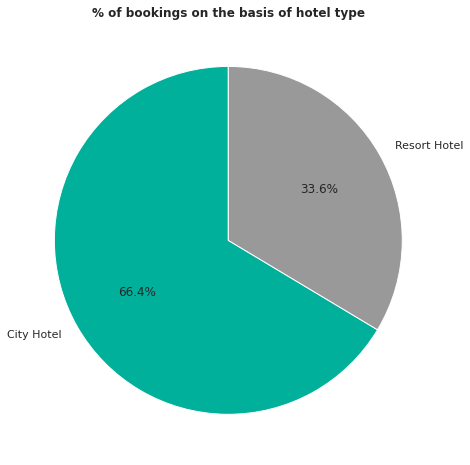

In [ ]:
#preparing data for plotting

hotels = ['City Hotel','Resort Hotel']
data=df['hotel'].value_counts()
plt.pie(data, labels = hotels,autopct='%1.1f%%',startangle=90,colors =['#00b09b','#999999'] )    #plotting the pie chart
plt.title("% of bookings on the basis of hotel type", weight = 'bold')    #giving title to the chart



*   In the given dataset, **City hotel bookings are almost double the Resort hotel bookings**.



In [ ]:
#Creating a new column 
df['cancelation'] = df.is_canceled.replace(to_replace= [1,0] , value= ['canceled', 'not_canceled'])
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cancelation
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,not_canceled
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01,not_canceled
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,not_canceled
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02,not_canceled
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03,not_canceled


Text(0.5, 1.0, '% of bookings - canceled / Not-canceled')

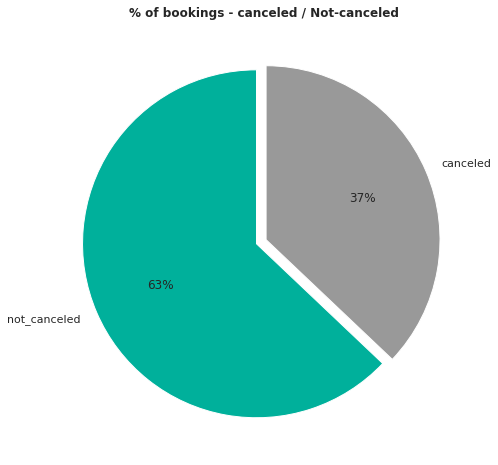

In [ ]:
#preparing data for plotting
canceled = ['not_canceled','canceled']
data=df['cancelation'].value_counts()
#plotting the pie chart
plt.pie(data,labels=canceled,autopct='%.0f%%',colors =['#00b09b','#999999'], startangle=90, explode = (0.05,0.01))
plt.title("% of bookings - canceled / Not-canceled", weight = 'bold')   #giving title to the chart

Text(0, 0.5, 'Count')

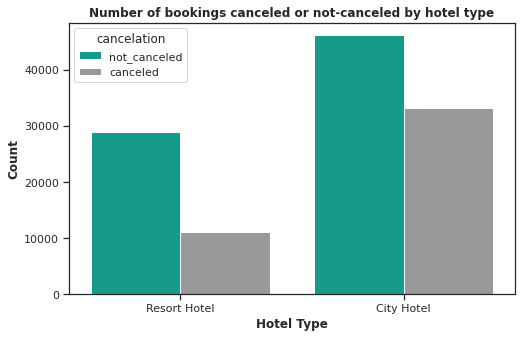

In [ ]:
#plotting the chart
plt.figure(figsize=(8,5))
sns.set_theme(style="ticks")
palette={'not_canceled':'#00b09b', 'canceled': '#999999'}
sns.countplot(x="hotel", hue="cancelation", data=df,palette=palette)
#giving title and axes labels
plt.title("Number of bookings canceled or not-canceled by hotel type", weight = 'bold')
plt.xlabel("Hotel Type", weight='bold')
plt.ylabel("Count", weight='bold')



*   Almost **37%** of total bookings are canceled by the customers.

*   From the above bar chart, it is clearly seen that maximum cancelations are from City Hotel customers ***(approx 42%)***.
*   Further, we will explore and analyze patterns in different categories with respect to cancelations and many more...




Text(43.02628750000001, 0.5, 'is_canceled')

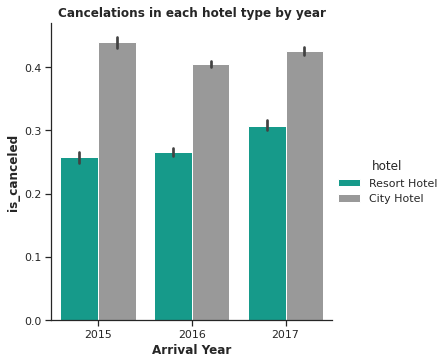

In [ ]:
#plotting joint bar chart
sns.set_theme(style="ticks")
palette={'Resort Hotel':'#00b09b', 'City Hotel': '#999999'}
sns.catplot(x="arrival_date_year", y="is_canceled", hue="hotel", kind="bar", data=df,palette=palette)
#giving title and axes labels
plt.title("Cancelations in each hotel type by year", weight='bold')
plt.xlabel("Arrival Year", weight ='bold')
plt.ylabel("is_canceled",weight = 'bold')



*   Cancelations from Resort hotel customers are increasing in the subsequent years - 2015 to 2017.

*   Whereas cancelations from City hotel customers are not showing any such trend. In year 2016, city hotel cancelations are least compared to years 2015 and 2017.



Text(0, 0.5, 'Number of Bookings')

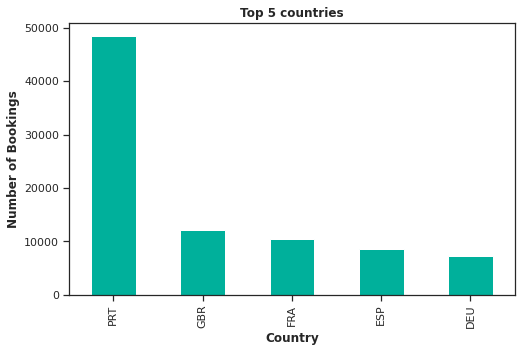

In [ ]:
#Finding the top 5 countries by their booking count
#plt.figure(figsize=(8,5))
top_5_countries = df['country'].value_counts().head(5)
top_5_countries.plot(kind = 'bar',color = '#00b09b',figsize=(8,5))
plt.title("Top 5 countries", weight ='bold')
plt.xlabel("Country", weight='bold')
plt.ylabel('Number of Bookings', weight='bold')



*  ***PRT (Portugal)*** is the top country in terms of number of bookings.

*   GBR (UK) and FRA (France) are approximately (1/5)th of the Portugal.



In [ ]:
#preparing data for visualization
from pandas.api.types import CategoricalDtype
cats=['January','February','March','April','May','June','July','August','September','October','November','December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['arrival_date_month'] = df['arrival_date_month'].astype(cat_type)

not_canceled_list = list(df[df['cancelation'] == 'not_canceled'].groupby('arrival_date_month').size())
canceled_list = list(df[df['cancelation'] == 'canceled'].groupby('arrival_date_month').size())

df_month_is_canceled = pd.DataFrame({'canceled_no':not_canceled_list, 'canceled_yes':canceled_list},index = cats)
df_month_is_canceled

,canceled_no,canceled_yes
January,4115,1806
February,5359,2693
March,6620,3148
April,6560,4518
May,7103,4677
June,6395,4534
July,7907,4737
August,8624,5237
September,6385,4115
October,6901,4246


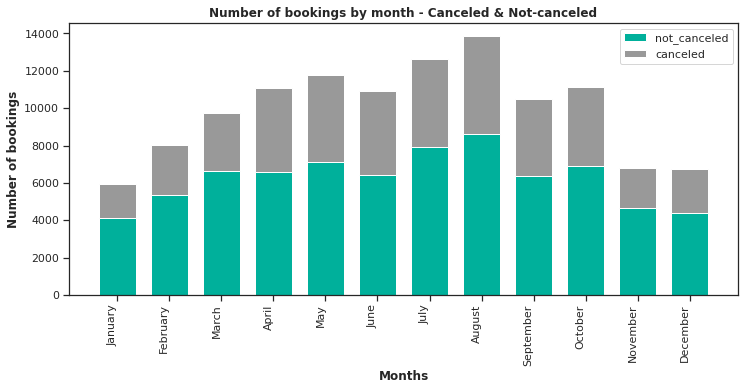

In [ ]:
#Fixing bar width for the stacked bar chart
barwidth = 0.7

#Creating a stacked bar chart
plt.figure(figsize=(12,5))
ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')   #getting x axis ticks-labels rotated by 90 degrees
p1 = plt.bar(cats, not_canceled_list, width=barwidth, color='#00b09b')
p2 = plt.bar(cats, canceled_list, bottom=not_canceled_list, width=barwidth, color='#999999')
#giving title,legend and axes labels
plt.title("Number of bookings by month - Canceled & Not-canceled", weight='bold')
plt.xlabel("Months", weight='bold')
plt.ylabel("Number of bookings",weight='bold')
plt.legend((p1[0], p2[0]), ('not_canceled', 'canceled'))
plt.show()

*   It is clearly visible that, on an average **August** month is having maximum number of bookings in all the 3 years.

*   June and April have approximately same number of bookings. And almost same cancelation percentages **(approx 41%)** which is the highest among all other months.



In [ ]:
#preparing data 
from pandas.api.types import CategoricalDtype
cats=['January','February','March','April','May','June','July','August','September','October','November','December']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['arrival_date_month'] = df['arrival_date_month'].astype(cat_type)
avg_adr_per_month = df['adr'].groupby(df['arrival_date_month']).mean()    #creating a table of months and their respective average ADR
avg_adr_per_month

arrival_date_month
January      70.45
February     73.72
March        80.88
April       100.47
May         108.77
June        116.76
July        126.94
August      140.26
September   105.13
October      88.01
November     73.97
December     81.32
Name: adr, dtype: float64

Text(0.5, 0, 'Average ADR')

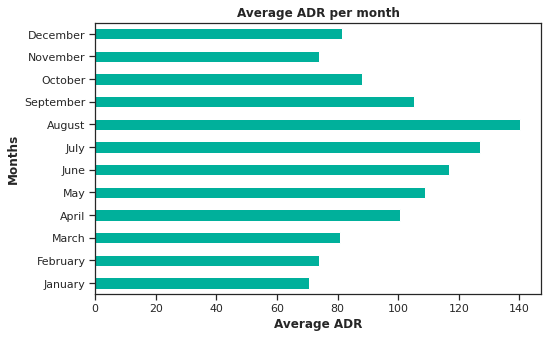

In [ ]:
avg_adr_per_month.plot(kind = 'barh',color = '#00b09b',figsize=(8,5))
plt.title("Average ADR per month",weight='bold')
plt.ylabel("Months",weight='bold')
plt.xlabel("Average ADR",weight='bold')



*   Average ADR in August month almost touched 140, which is very high compared to other months' ADR.

*   January has the least average ADR throughout all years.

*   Despite of high average ADR, August month has highest number of bookings.





In [ ]:
#converting day, month and year columns into single date column
df['date'] = df['arrival_date_day_of_month'].astype(str) + '-' + df['arrival_date_month'].astype(str) + '-' + df['arrival_date_year'].astype(str)
df['arrival_date'] = pd.to_datetime(df['date'])
df['day_name'] = df['arrival_date'].dt.day_name()   #extracting the name of the day from date
#checking for newly added columns
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cancelation,date,arrival_date,day_name
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,not_canceled,1-July-2015,2015-07-01,Wednesday
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,not_canceled,1-July-2015,2015-07-01,Wednesday


In [ ]:
# Preparing the data to plot
from pandas.api.types import CategoricalDtype
cats=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['day_name'] = df['day_name'].astype(cat_type)
number_of_customers_by_day_name = df.groupby('day_name').size()   #created a table with day name and number of bookings having respective day name
number_of_customers_by_day_name

day_name
Monday       18152
Tuesday      13971
Wednesday    16099
Thursday     19225
Friday       19602
Saturday     18036
Sunday       14125
dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


Text(0, 0.5, 'Number of Customers')

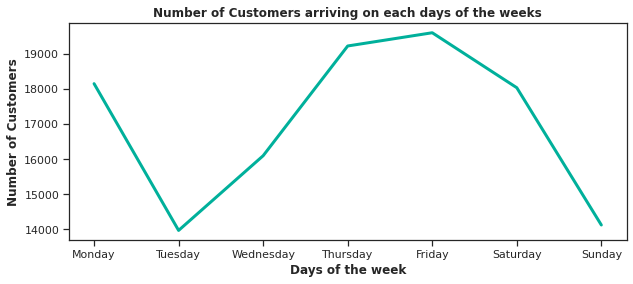

In [ ]:
#plotting line graph
plt.figure(figsize=(10,4))
plt.plot(number_of_customers_by_day_name,color = "#00b09b",linewidth = 3)
#giving title and axes labels
plt.title("Number of Customers arriving on each days of the weeks", weight='bold')
plt.xlabel("Days of the week", weight='bold')
plt.ylabel("Number of Customers",weight='bold')



*   We can clearly spot that, on Tuesday and Sunday very less customers arrive at the hotels.

*   Highest number of customers arrive on Friday, followed by Thursday, as these days are very close to weekend.
*   On Monday and Saturday approximately same number of customers arrive at the hotels.




In [ ]:
#Creating column 'month_year' for analysis with respect to ADR
df['month_year'] = df['arrival_date_month'].astype(str) + '-' + df['arrival_date_year'].astype(str)
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cancelation,date,arrival_date,day_name,month_year
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,not_canceled,1-July-2015,2015-07-01,Wednesday,July-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,not_canceled,1-July-2015,2015-07-01,Wednesday,July-2015


In [ ]:
#preparing data for plotting
from pandas.api.types import CategoricalDtype
cats=['July-2015','August-2015','September-2015','October-2015','November-2015','December-2015','January-2016','February-2016','March-2016','April-2016','May-2016','June-2016','July-2016','August-2016','September-2016','October-2016','November-2016','December-2016','January-2017','February-2017','March-2017','April-2017','May-2017','June-2017','July-2017','August-2017']
cat_type = CategoricalDtype(categories=cats, ordered=True)
df['month_year'] = df['month_year'].astype(cat_type)
#creating a table
avg_adr_per_month_year = df['adr'].groupby(df['month_year']).mean()
avg_adr_per_month_year

month_year
July-2015         97.90
August-2015      106.09
September-2015    94.91
October-2015      78.99
November-2015     60.66
December-2015     74.26
January-2016      64.77
February-2016     70.21
March-2016        79.15
April-2016        88.94
May-2016          96.43
June-2016        107.02
July-2016        125.80
August-2016      143.07
September-2016   114.81
October-2016      95.22
November-2016     80.98
December-2016     86.67
January-2017      73.93
February-2017     76.98
March-2017        82.57
April-2017       111.53
May-2017         119.49
June-2017        125.90
July-2017        143.10
August-2017      164.32
Name: adr, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:348: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


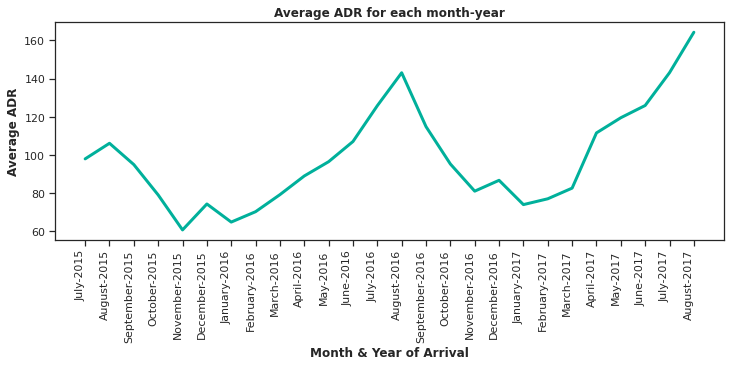

In [ ]:
#plotting line graph
plt.figure(figsize=(12,4))
ax = plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=90, ha='right')   #getting x axis ticks-labels rotated by 90 degrees
plt.plot(avg_adr_per_month_year,color = "#00b09b",linewidth = 3)
#Giving axis labels and title to the chart
plt.title("Average ADR for each month-year",weight='bold')
plt.xlabel("Month & Year of Arrival",weight='bold')
plt.ylabel("Average ADR",weight='bold')
plt.show()



*   There is an overall growth in the average daily rate of the hotels.

*   Every year, August is the month in which Hotels are having highest ADR compared to other months.

*   If we analyze this line graph by **Customer's point of view**, then they must book hotels between October to March, to get the lowest possible average daily rate.





In [ ]:
#preparing the data for plotting
not_canceled_list = list(df[df['cancelation'] == 'not_canceled'].groupby(df['market_segment']).size())
canceled_list = list(df[df['cancelation'] == 'canceled'].groupby(df['market_segment']).size())
canceled_list.pop()
index = ['Aviation','Complementary','Corporate','Direct','Groups','Offline TA/TO','Online TA']
df_mark_seg_is_canceled = pd.DataFrame({'canceled_no':not_canceled_list, 'canceled_yes':canceled_list}, index = index)
print(df_mark_seg_is_canceled)

               canceled_no  canceled_yes
Aviation               183            52
Complementary          639            89
Corporate             4291           991
Direct               10648          1934
Groups                7697         12094
Offline TA/TO        15880          8302
Online TA            35673         20735


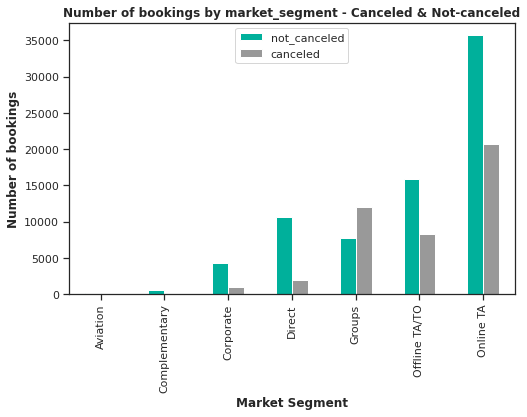

In [ ]:
#plotting joint bar chart
df_mark_seg_is_canceled.plot(kind='bar',color = ['#00b09b','#999999'],figsize=(8,5))

#Giving title and labels to axes
plt.title("Number of bookings by market_segment - Canceled & Not-canceled", weight='bold')
plt.xlabel("Market Segment", weight='bold')
plt.ylabel("Number of bookings",weight='bold')
plt.legend(('not_canceled', 'canceled'),loc='upper center')
plt.show()



*   Approximately half (47%) of the bookings are done via Online TA market segment. And all the other market segments contribute to remaining half bookings.

*   From the above chart, it is vey clear that cancelation rate is much higher in groups market segment. So, the Hotel Management can predict maximum cancelations from groups.



In [ ]:
#combining children and babies column for analysing relation with special requests
df['kids'] = df['children'] + df['babies']
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,cancelation,date,arrival_date,day_name,month_year,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,not_canceled,1-July-2015,2015-07-01,Wednesday,July-2015,0.00
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Check-Out,2015-07-01,not_canceled,1-July-2015,2015-07-01,Wednesday,July-2015,0.00


In [ ]:
#preparing data for plotting
count_of_special_requests = df.groupby(df['kids'])['total_of_special_requests'].size()
sum_of_special_requests = df.groupby(df['kids'])['total_of_special_requests'].sum()
special_request_by_kids = sum_of_special_requests / count_of_special_requests *100
special_request_by_kids

kids
0.00     54.13
1.00    106.89
2.00     72.24
3.00     97.30
9.00      0.00
10.00   100.00
Name: total_of_special_requests, dtype: float64

In [ ]:
#creating a dataframe containing percentage 
index = sorted(list(df['kids'].unique()))
index.pop()
index.pop()
df_special_request_by_kids = pd.DataFrame({'Sum of total special requests': sum_of_special_requests, 'Count of total special requests': count_of_special_requests, 'Percentage': special_request_by_kids}, index = index)
df_special_request_by_kids


,Sum of total special requests,Count of total special requests,Percentage
0.00,59473,109878,54.13
1.00,5821,5446,106.89
2.00,2725,3772,72.24
3.00,108,111,97.30


Text(0.5, 0, 'Number of kids')

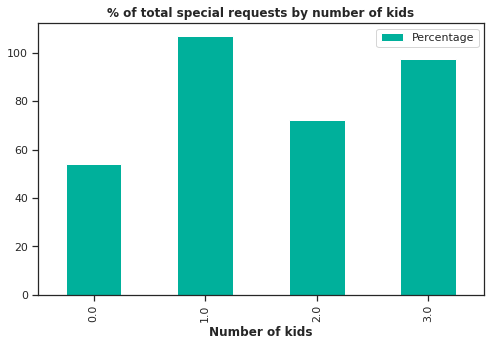

In [ ]:
#plotting the bar chart
df_special_request_by_kids.plot(kind ='bar', y ='Percentage', color='#00b09b',figsize=(8,5))
plt.title("% of total special requests by number of kids", weight ='bold')
plt.xlabel("Number of kids",weight='bold')



*   Special requests are very less from the customers with NO kids, whereas if there are one or more kids with the customers, then there is a very high chance that they will throw a number of special requests.

*   We can't say that number of special requests is directly proportional to number of kids, but yes if the customer is with kid/kids, then the Hotel Management can expect high number of special requests.



In [ ]:
#creating a new column
criteria = {range(0,30):'0-30', range(30,90): '30-90', range(90,180): '90-180', range(180,365): '180-365', range(365,740): '365 above'}
df['lead_time_range'] = df['lead_time'].apply(lambda x: next((v for k, v in criteria.items() if x in k), 0))    #created new column for lead_time range
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,total_of_special_requests,reservation_status,reservation_status_date,cancelation,date,arrival_date,day_name,month_year,kids,lead_time_range
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,not_canceled,1-July-2015,2015-07-01,Wednesday,July-2015,0.00,180-365
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Check-Out,2015-07-01,not_canceled,1-July-2015,2015-07-01,Wednesday,July-2015,0.00,365 above


In [ ]:
#preparing the data for plotting
count_of_canceled_bookings = df.groupby(df['lead_time_range'])['is_canceled'].size()
sum_of_canceled_bookings = df.groupby(df['lead_time_range'])['is_canceled'].sum()
cancelations_against_lead_time_range = sum_of_canceled_bookings / count_of_canceled_bookings *100
#preparing a dataframe
df_cancelations_against_lead_time_range = pd.DataFrame({'Number of Bookings': count_of_canceled_bookings, 'Cancelations in Percentages': cancelations_against_lead_time_range})
df_reindex = df_cancelations_against_lead_time_range.reindex(['0-30','30-90','90-180','180-365','365 above'])   #reindexing the dataframe
df_reindex

,Number of Bookings,Cancelations in Percentages
lead_time_range,,
0-30,37922,18.26
30-90,29894,37.82
90-180,26443,44.58
180-365,21739,55.20
365 above,3212,67.96


Text(0, 0.5, 'Cancelation percentage')

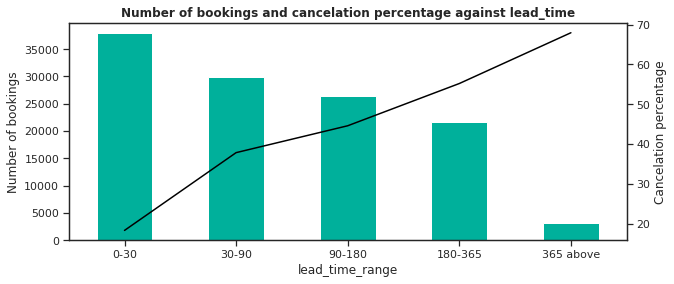

In [ ]:
fig = plt.figure(figsize =(10, 4))
ax = plt.subplot()
plt.setp(ax.get_xticklabels(),ha = 'center')
df_reindex['Number of Bookings'].plot(kind='bar',color ='#00b09b', ylabel = "Number of bookings")
df_reindex['Cancelations in Percentages'].plot(secondary_y=True,color ='#000000')
#Giving axis labels and title
plt.title("Number of bookings and cancelation percentage against lead_time", weight = 'bold')
plt.ylabel("Cancelation percentage")

*   As we can see in above chart, **lead_time and booking cancelations are directly proportional** to each other. That is, **if lead_time is high then there is highest chance that the booking will get canceled**.

*   On the other hand, **lead_time and number of bookings are inversely proportional**. That is, **there are very less no. of bookings with very high lead_time.**.



    total_nights
1          95.00
2          98.00
3         105.00
4         105.00
5         113.00
6         120.00
7         103.00
8         114.00
9         115.00
10        108.00
11        109.00
12        107.00
13        113.00
14         95.00


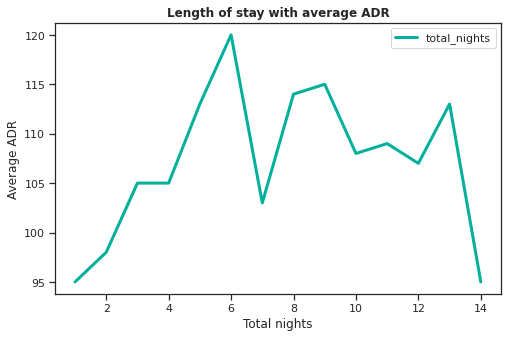

In [ ]:
df['total_nights']= df['stays_in_week_nights']+df['stays_in_weekend_nights']
avg_adr_total_nights = list(round(df['adr'].groupby(df['total_nights']).mean(),0))[1:15]

index = range(1,15)
df_best_adr = pd.DataFrame({'total_nights':avg_adr_total_nights}, index=index)
print(df_best_adr)
#plotting of graph
df_best_adr.plot(linewidth = 3,color='#00b09b',figsize=(8,5))
plt.xlabel("Total nights")
plt.ylabel("Average ADR")
plt.title("Length of stay with average ADR", weight = 'bold')
plt.show()



*  From above graph, it is very much clear that if any guest is spending upto 4 nights or 7 nights in a hotel, they will be getting best average daily rate possible.


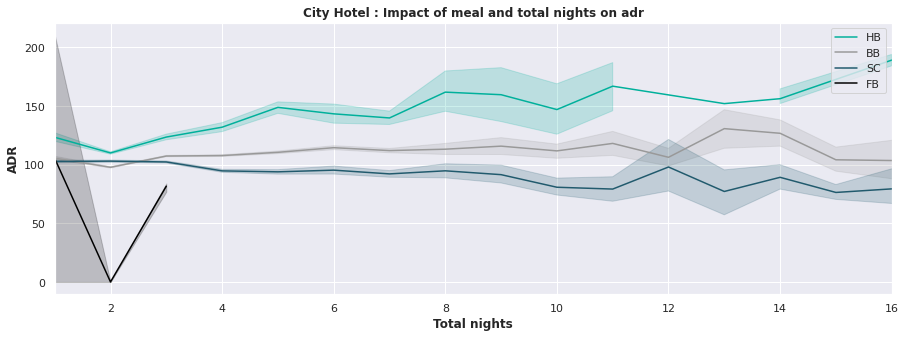

In [ ]:
df_city_hotel= df[df['hotel']== 'City Hotel']   #getting all rows of City Hotel 
sns.set(rc = {'figure.figsize':(15,5)})
fig, ax = plt.subplots()
sns.lineplot(x = "total_nights", y = "adr", hue="meal",hue_order= ['HB','BB','SC','FB'],data=df_city_hotel, ax=ax, palette=['#00b09b','#999999','#215A6D','#000000'])
ax.set_xlim(1, 16)    #setting x axis limit
#giving title, legend and axis labels
plt.title("City Hotel : Impact of meal and total nights on adr", weight = 'bold')
plt.xlabel("Total nights",weight='bold')
#plt.xticks(rotation = 90)
plt.ylabel("ADR",weight='bold')
plt.legend(loc = 'upper right')
plt.show()



*  In City Hotels, one can stay upto 3 nights with any type of meal  at around same adr.
*   Whereas, if one book hotel for more than 3 nights, then it is always pocket friendly with SC meal plan, followed by BB.






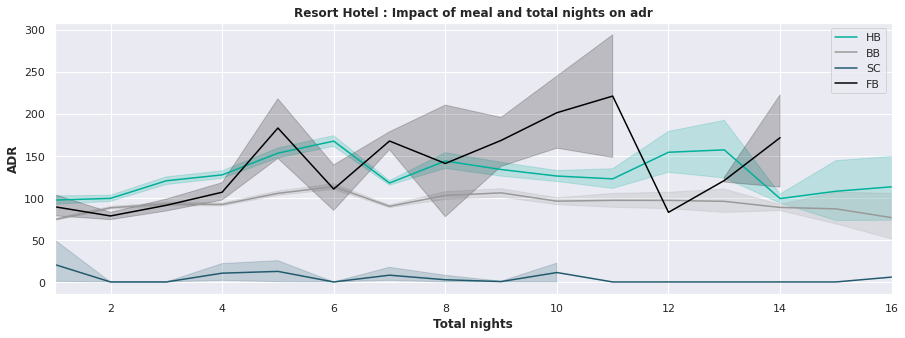

In [ ]:
df_resort_hotel= df[df['hotel']== 'Resort Hotel']
sns.set(rc = {'figure.figsize':(15,5)})
fig, ax = plt.subplots()
sns.lineplot(x = "total_nights", y = "adr", hue="meal",hue_order= ['HB','BB','SC','FB'],data=df_resort_hotel, ax=ax, palette=['#00b09b','#999999','#215A6D','#000000'])
ax.set_xlim(1, 16)
plt.title("Resort Hotel : Impact of meal and total nights on adr", weight = 'bold')
plt.xlabel("Total nights",weight='bold')
#plt.xticks(rotation = 90)
plt.ylabel("ADR",weight='bold')
plt.legend(loc = 'upper right')
plt.show()



*   In Resort Hotels, upto 4 nights one can get approximately same adr with meal plans like - HB,BB and FB.

*   Whereas, for more than 4 nights, there is no such trend found.

*  Further, average adr for HB meal plan is always greater than that of BB meal plan, irrespective of Hotel type - Resort or City.






Text(0, 0.5, 'Count')

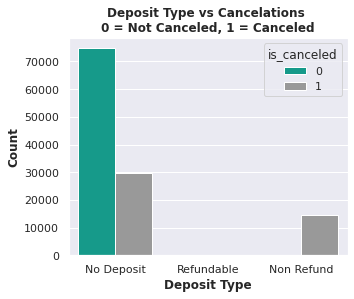

In [ ]:
#plotting seaborn countplot
plt.figure(figsize=(5,4))
sns.countplot(x= 'deposit_type',hue = 'is_canceled',data = df,palette=['#00b09b','#999999'])
#giving title and labeling axes
plt.title('Deposit Type vs Cancelations \n0 = Not Canceled, 1 = Canceled',weight = 'bold')
plt.xlabel('Deposit Type',weight='bold')
plt.ylabel('Count',weight='bold')

*   As we can see in the above chart, almost 88% of the bookings are done with 'No Deposit' policy, but at the same time cancelations are also possible when customers don't pay any advance.

*   ***Surprisingly!*** When we compare % of cancelations among 'No Deposit' and 'Non-Refund' policies, the data shows that if customers are booking with 'Non-Refund' policy, then they are most likely (99%) to cancel their booking.


In [ ]:
df_canceled= df[df['cancelation']== 'canceled']
df_canceled.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reservation_status,reservation_status_date,cancelation,date,arrival_date,day_name,month_year,kids,lead_time_range,total_nights
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,Canceled,2015-05-06,canceled,1-July-2015,2015-07-01,Wednesday,July-2015,0.00,30-90,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,Canceled,2015-04-22,canceled,1-July-2015,2015-07-01,Wednesday,July-2015,0.00,30-90,3


Text(0, 0.5, 'Count')

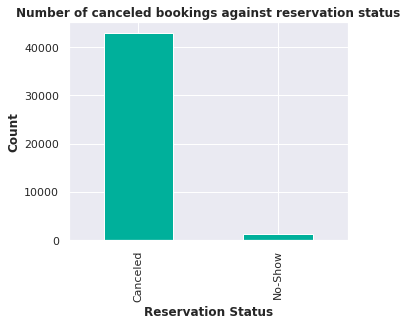

In [ ]:
#Preparing data for plotting
reservation_status_against_canceled_bookings = df_canceled['reservation_status'].value_counts()
#plotting the chart
reservation_status_against_canceled_bookings.plot(kind='bar',color='#00b09b',figsize = (5,4))
#giving axes labels and title to the chart
plt.title("Number of canceled bookings against reservation status",weight='bold')
plt.xlabel("Reservation Status", weight='bold')
plt.ylabel("Count", weight='bold')



*   There is very less percentage of No-Show customers. Maximum customers cancel their booking before arrival date itself.



Text(0, 0.5, 'Count')

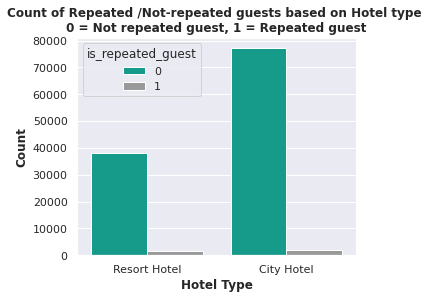

In [ ]:
#plotting seaborn countplot
plt.figure(figsize=(5,4))
sns.countplot(x= 'hotel',hue = 'is_repeated_guest',data = df,palette=['#00b09b','#999999'])
#giving title and labeling axes
plt.title('Count of Repeated /Not-repeated guests based on Hotel type \n0 = Not repeated guest, 1 = Repeated guest',weight = 'bold')
plt.xlabel('Hotel Type',weight='bold')
plt.ylabel('Count',weight='bold')



*  The count of repeated guests in both hotel types (City and Resort) is significantly low.

*   The Hotel Management must discover strategies to promote customers to visit their hotel again.



Text(0, 0.5, 'Count')

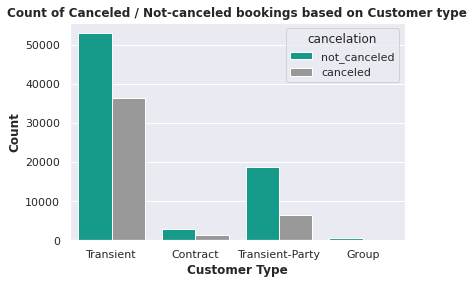

In [ ]:
#plotting seaborn countplot
plt.figure(figsize=(6,4))
sns.countplot(x= 'customer_type',hue = 'cancelation',data = df,palette=['#00b09b','#999999'])
#giving title and labeling axes
plt.title('Count of Canceled / Not-canceled bookings based on Customer type',weight = 'bold')
plt.xlabel('Customer Type',weight='bold')
plt.ylabel('Count',weight='bold')



*   Highest number of bookings are done by the Transient type of customers. (approx 75% of total bookings)
*   But at the same time, cancelation rate is also high (nearly 40%) in Transient type of customers.



# **Conclusions**

---



* November to February is the best period to book hotels, as they are less crowdy and also at that time, the ADR is also lower compared to the other months in the year.

*   The customers can book hotels for upto 4 nights to get the best average daily rate possible.

* The Hotel Management can predict high number of special requests when the customers are with kids (children/babies).

* In every year, August is the most busiest month for the Hotels (City/Resort). Customers are booking the hotels with a very high ADR.

* Even though City Hotel has double bookings than Resort Hotel, they end up having high cancelation rate (approx 75%).

* PRT (Portugal) is the top country in terms of number of bookings.

* Highest number of customers arrive on Friday, followed by Thursday, as these days are very close to weekend.

* Cancelations from Resort hotel customers are increasing in the subsequent years - 2015 to 2017.

* Maximum bookings are done via Online TA market segment, but Groups market segment has highest cancelation percentage among all market segments. 

* For higher lead time, Hotel management can predict less number of bookings and higher cancelation rate.

* Average adr for HB meal plan is always greater than that of BB meal plan, irrespective of Hotel type and length of stay.

* Maximum number of bookings are done with 'No-deposit' policy, but cancelation rate is much higher in bookings done with 'Non-refund' policy, which is really surprising!

* Almost all but few customers cancel their booking before arrival date itself.

* The Hotel management should take some steps to promote customers to visit hotel again.




# ***Thank You*** ❗



---

